## RRSG 2019 Challenge 

#### Load ISMRM RRSG 2019 challenge data. Please see [this OSF repository](https://osf.io/xne9w/) for details. 

In [ ]:
load('/tmp/rrsg_challenge/brain_radial_96proj_12ch.mat');
whos % Show variables in the current scope 

#### Change data order to follow BART's dimension convention and display the rawdata from all (12) channels. 

In [2]:
rawdata = permute(rawdata,[4,3,2,1]); 
trajectory = permute(trajectory,[3,2,1]);
[~,nFE,nSpokes,nCh] = size(rawdata);
whos

Variables in the current scope:

   Attr Name            Size                     Bytes  Class
   ==== ====            ====                     =====  ===== 
        ans             1x5                          5  char
        nCh             1x1                          8  double
        nFE             1x1                          8  double
        nSpokes         1x1                          8  double
   c    rawdata         1x512x96x12            4718592  single
        trajectory      3x512x96                589824  single

Total is 737288 elements using 5308445 bytes



Done.


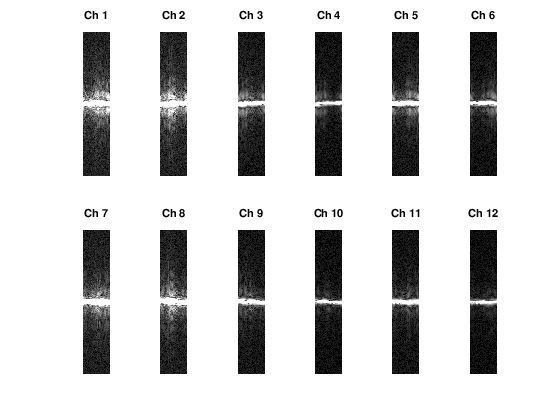

In [3]:
for ii=1:12
cc = squeeze((rawdata(1,:,:,ii)));
% Brighten convention is not 1/1 with matlab.  
subplot(2,6,ii); 
imshow(log(1+abs(cc)),[-0 0.0001]); brighten(0.4); title(['Ch ' num2str(ii)]);
end
ks_rss = bart('rss 8',rawdata);
zf_coils = bart('fft -i 8', rawdata);
zf_rss = bart('rss 8', zf_coils);

[calib emaps] = bart('ecalib -r 20', rawdata); 




In [4]:
adj = bart('nufft -d256:256:1 -a',trajectory,rawdata);

Done.


In [5]:
psf = bart('nufft -d256:256:1 -a ', trajectory, ones(1, nFE, nSpokes));

Done.


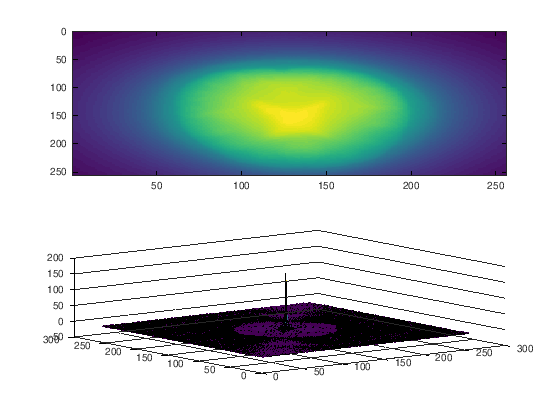

In [6]:
adj_combined = bart('rss 8',adj);


adj_combined_r = real(adj_combined);
psf_r = real(psf);

figure();
subplot(2,1,1); imagesc(adj_combined_r);
subplot(2,1,2); surf(psf_r);


In [14]:
% Transform regridded image back to k-space 
adjk = bart('fft -u 7', adj);
% Transform PSF back to k-space 
psfk = bart('fft -u 7', psf);

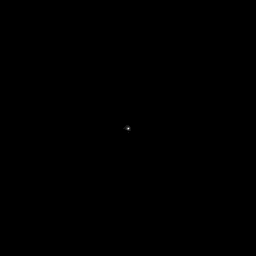

In [44]:
% Oversample in 
pp = bart('scale 0.5',adjk);
adji = bart('fft -i 7', pp);
imshow(log(1 + abs(pp(:,:,1,1))),[-0 0.0001]); brighten(0.4)



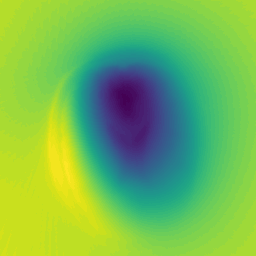

In [61]:
rr = ifft2(fftshift(pp(:,:,1,1)));
imagesc(fftshift(real(rr)))

In [ ]:
igrid = bart('nufft -i -t', trajectory, rawdata);


In [ ]:
kk = bart('pics -t',trajectory,rawdata,calib);

In [ ]:
function [outRD, outTR] = subSample(RD,TR,factor,nSpokes)

    outTR = TR(:,:,1:factor:nSpokes);
    outRD = RD(:,:,1:factor:nSpokes,:);

end